In [2]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [3]:
from sklearn.datasets import make_moons

x, y = make_moons(n_samples=10000, noise=0.4, random_state=42)

In [4]:
x

array([[ 0.9402914 ,  0.12230559],
       [ 0.12454026, -0.42477546],
       [ 0.26198823,  0.50841438],
       ...,
       [-0.24177973,  0.20957199],
       [ 0.90679645,  0.54958215],
       [ 2.08837082, -0.05050728]])

(array([[1.900e+01, 2.700e+02, 9.300e+02, 1.488e+03, 2.039e+03, 2.274e+03,
         1.544e+03, 1.092e+03, 3.180e+02, 2.600e+01],
        [0.000e+00, 4.200e+01, 6.750e+02, 2.316e+03, 3.227e+03, 2.551e+03,
         1.064e+03, 1.230e+02, 2.000e+00, 0.000e+00]]),
 array([-2.38671111, -1.81720413, -1.24769715, -0.67819016, -0.10868318,
         0.4608238 ,  1.03033078,  1.59983777,  2.16934475,  2.73885173,
         3.30835871]),
 <a list of 2 BarContainer objects>)

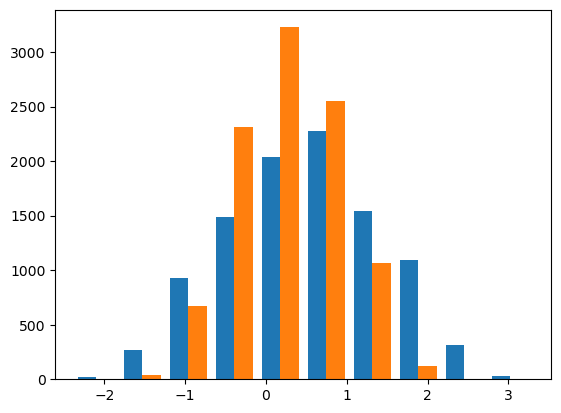

In [5]:
plt.hist(x)

(array([5000.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
        5000.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

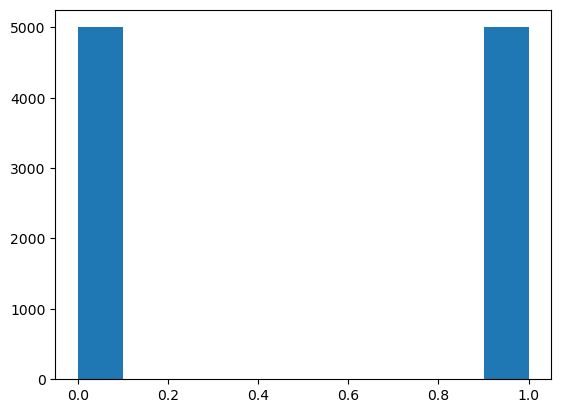

In [6]:
plt.hist(y)

In [7]:
x.shape

(10000, 2)

In [8]:
y.shape

(10000,)

In [9]:

df1=pd.DataFrame({'feature 1':x[:,0],'feature 2':x[:,1],'target':y})
df1

,feature 1,feature 2,target
0,0.940291,0.122306,1
1,0.124540,-0.424775,0
2,0.261988,0.508414,0
3,-0.495238,0.072589,0
4,-0.879413,0.549373,0
...,...,...,...
9995,0.406096,0.389485,1
9996,0.188299,0.755326,1
9997,-0.241780,0.209572,1
9998,0.906796,0.549582,0


<Axes: >

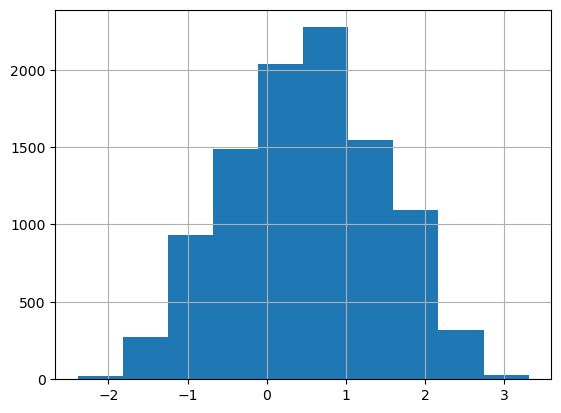

In [10]:
df1['feature 1'].hist()

<Axes: >

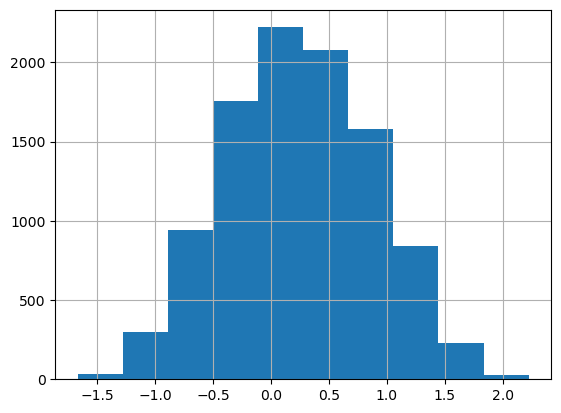

In [11]:
df1['feature 2'].hist()

In [12]:
df1.isna().sum()

feature 1    0
feature 2    0
target       0
dtype: int64

In [13]:
from sklearn.model_selection import train_test_split

train_df,test_df=train_test_split(df1,test_size=0.2,random_state=42)

In [14]:
print(train_df.shape)
test_df.shape

(8000, 3)


(2000, 3)

In [15]:
input=df1[['feature 1','feature 2']].columns
target_col='target'

In [16]:
from sklearn.tree import DecisionTreeClassifier

model=DecisionTreeClassifier(max_depth=6,max_leaf_nodes=4)
model.fit(train_df[input],train_df[target_col])

DecisionTreeClassifier(max_depth=6, max_leaf_nodes=4)

In [17]:
model.score(train_df[input],train_df[target_col])

0.8555

In [18]:
from sklearn.model_selection import cross_val_score

cross_val_score(model,train_df[input],train_df[target_col]).mean()

0.8530000000000001

In [19]:
model.score(test_df[input],test_df[target_col])

0.863

making a random forrest 

In [20]:
from sklearn.utils import shuffle

n_trees=1000
n_instances=100

big_tree=shuffle(df1,random_state=42)


In [21]:
mini_trees=[]
for i in range(1000):
    mini_trees.append(big_tree.sample(100))

In [22]:
acuracy_scores=[]
for tree in mini_trees:
    model.fit(tree[input],tree[target_col])
    acuracy_scores.append(model.score(test_df[input],test_df[target_col]))


In [23]:
np.mean(acuracy_scores)

0.8363605

In [24]:
test_df.reset_index(inplace=True)

In [25]:
test_df.drop('index',axis=1,inplace=True)

In [26]:
q=test_df.iloc[0][input]
np.reshape(q,(1,-1))

array([[ 0.69945888, -0.8734481 ]])

In [27]:
from  scipy.stats import mode

score=mode(acuracy_scores)
score

ModeResult(mode=0.861, count=20)

In [28]:
# preds=[]
# for tree in mini_trees:
#     model.fit(tree[input],tree[target_col])
#     for i in range(len(test_df)):

#         preds.append(model.predict(np.reshape(test_df.iloc[i][input],(1,-1))))



<Axes: xlabel='feature 1', ylabel='feature 2'>

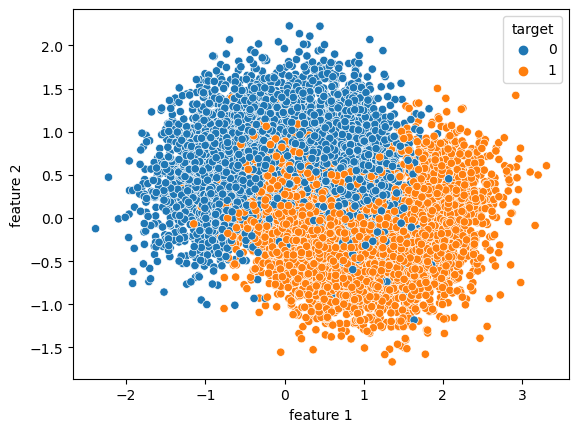

In [29]:
sns.scatterplot(x=df1['feature 1'],y=df1['feature 2'],hue=df1['target'])

In [30]:
from sklearn.svm import SVC

model1=SVC(kernel='poly',C=3,coef0=4)
model1.fit(train_df[input],train_df[target_col])

SVC(C=3, coef0=4, kernel='poly')

In [31]:
model1.score(train_df[input],train_df[target_col])

0.860875

In [32]:
cross_val_score(model1,train_df[input],train_df[target_col]).mean()

0.860375

In [33]:
model1.score(test_df[input],test_df[target_col])

0.873

c:\Users\Shree\miniconda3\envs\hands_on_ml\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


<Axes: xlabel='feature 1', ylabel='feature 2'>

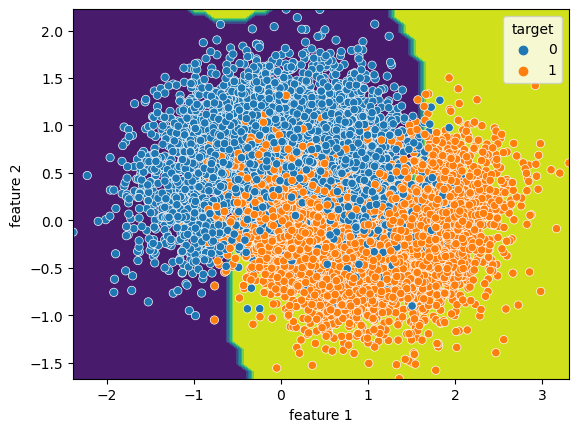

In [34]:
from sklearn.inspection import DecisionBoundaryDisplay
feature_1, feature_2 = np.meshgrid(
    np.linspace(train_df['feature 1'].min(),train_df['feature 1'].max()),
    np.linspace(train_df['feature 2'].min(),train_df['feature 2'].max())
)
grid = np.vstack([feature_1.ravel(), feature_2.ravel()]).T
y_pred = np.reshape(model1.predict(grid),feature_1.shape)
display = DecisionBoundaryDisplay(
    xx0=feature_1, xx1=feature_2, response=y_pred
)
display.plot()
sns.scatterplot(x=train_df['feature 1'],y=train_df['feature 2'],hue=train_df['target'],color=['C3','C5'])

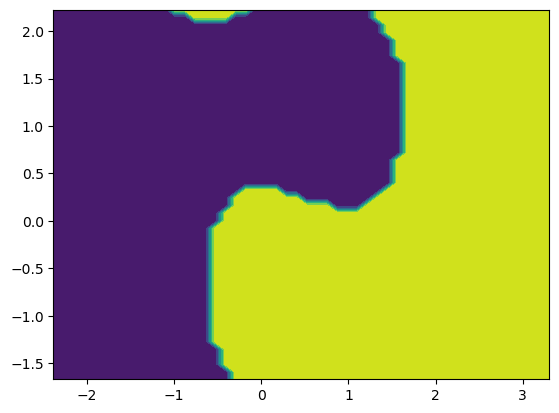

In [35]:
display.plot()

c:\Users\Shree\miniconda3\envs\hands_on_ml\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


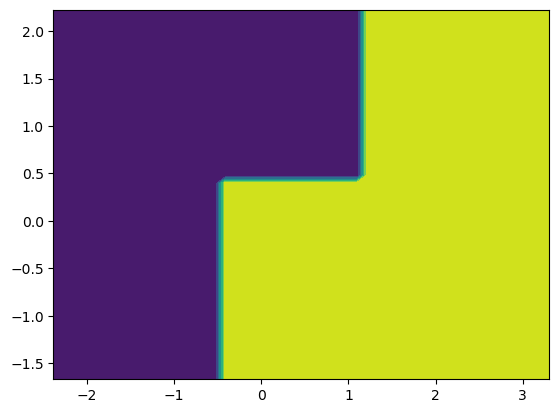

In [36]:
from sklearn.inspection import DecisionBoundaryDisplay
feature_1, feature_2 = np.meshgrid(
    np.linspace(train_df['feature 1'].min(),train_df['feature 1'].max()),
    np.linspace(train_df['feature 2'].min(),train_df['feature 2'].max())
)
grid = np.vstack([feature_1.ravel(), feature_2.ravel()]).T
y_pred = np.reshape(model.predict(grid),feature_1.shape)
display = DecisionBoundaryDisplay(
    xx0=feature_1, xx1=feature_2, response=y_pred
)
display.plot()
# sns.scatterplot(x=train_df['feature 1'],y=train_df['feature 2'],hue=train_df['target'],color=['C3','C5'])

this is the weakpoint of descion trees it gives edged descion boundaries

[Text(0.5, 0.8333333333333334, 'x[1] <= 0.422\ngini = 0.493\nsamples = 100\nvalue = [44, 56]'),
 Text(0.25, 0.5, 'x[0] <= -0.488\ngini = 0.301\nsamples = 65\nvalue = [12, 53]'),
 Text(0.125, 0.16666666666666666, 'gini = 0.0\nsamples = 4\nvalue = [4, 0]'),
 Text(0.375, 0.16666666666666666, 'gini = 0.228\nsamples = 61\nvalue = [8, 53]'),
 Text(0.75, 0.5, 'x[0] <= 1.135\ngini = 0.157\nsamples = 35\nvalue = [32, 3]'),
 Text(0.625, 0.16666666666666666, 'gini = 0.0\nsamples = 32\nvalue = [32, 0]'),
 Text(0.875, 0.16666666666666666, 'gini = 0.0\nsamples = 3\nvalue = [0, 3]')]

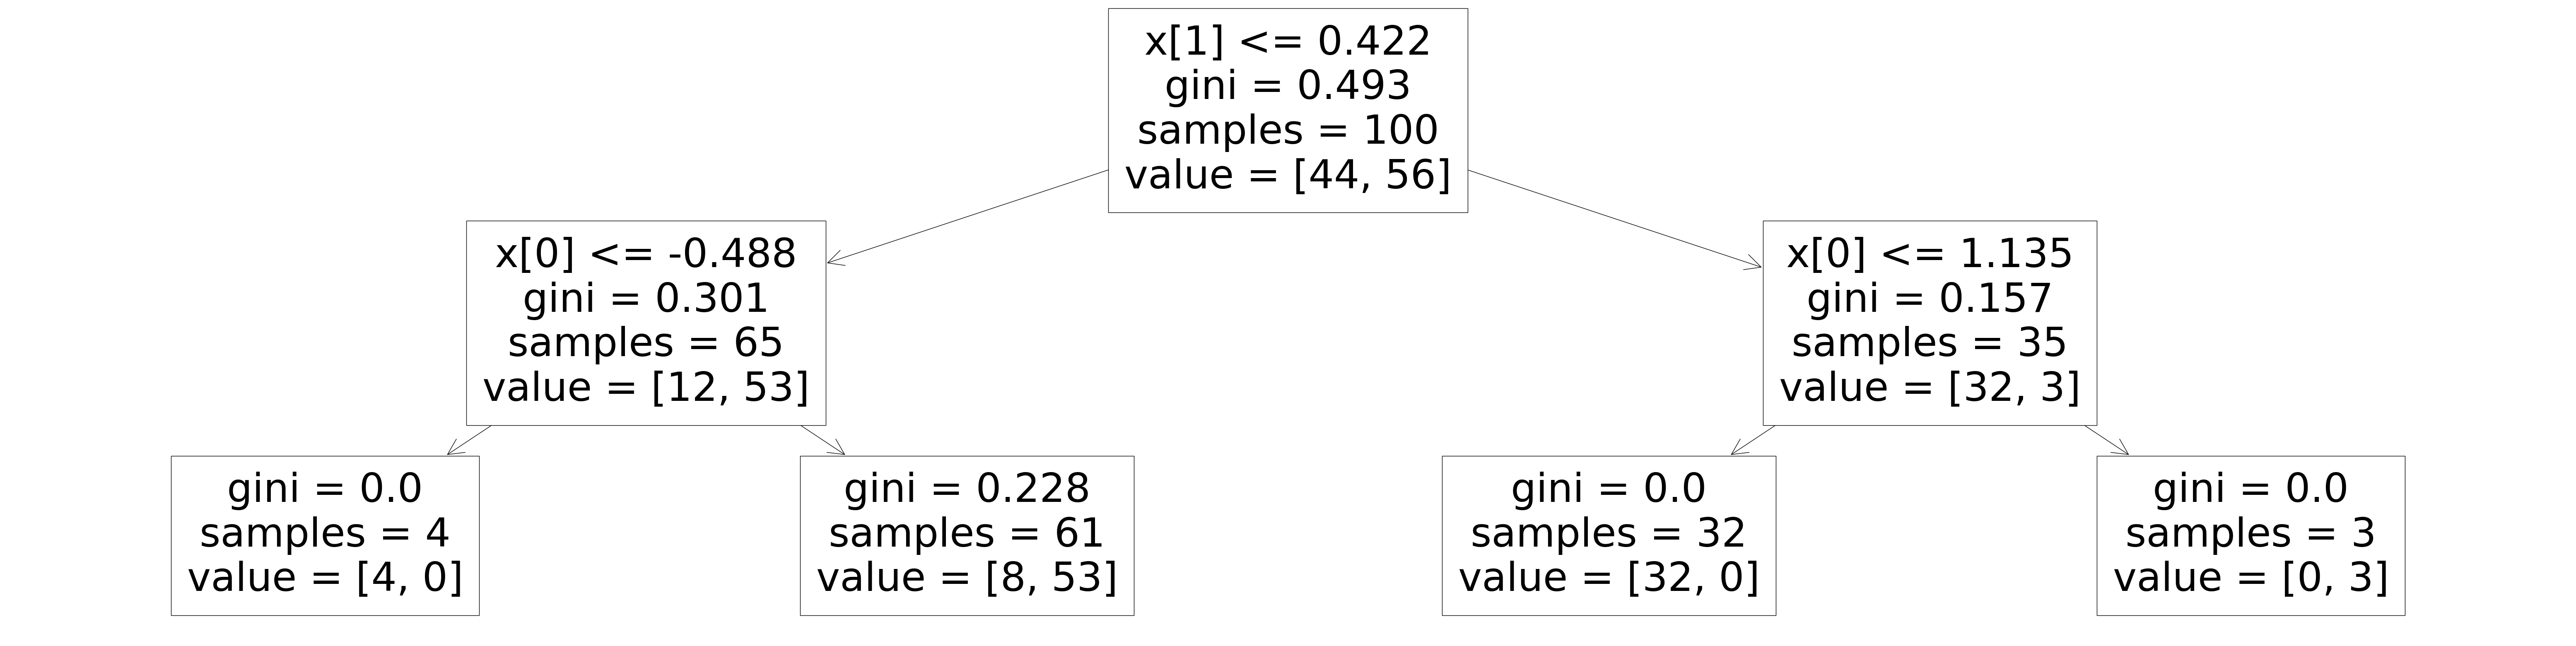

In [37]:
from sklearn.tree import plot_tree

plt.figure(figsize=(80,20))
plot_tree(model,max_depth=4)

<Axes: xlabel='feature 1', ylabel='feature 2'>

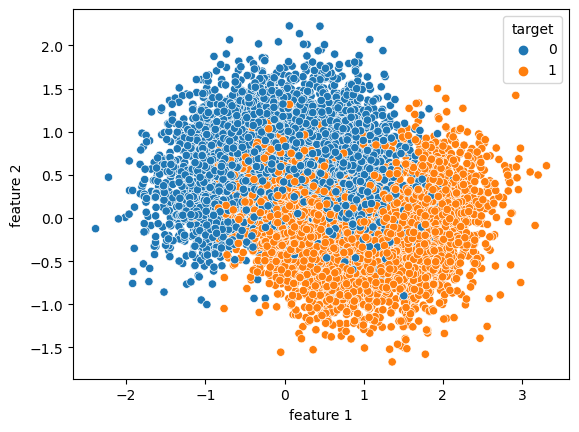

In [38]:
sns.scatterplot(x=train_df['feature 1'],y=train_df['feature 2'],hue=train_df['target'],color=['C3','C5'])

<Axes: xlabel='feature 1', ylabel='target'>

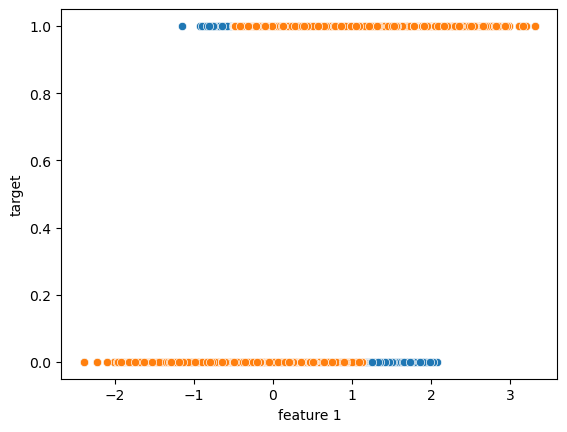

In [39]:
sns.scatterplot(x=train_df['feature 1'],y=train_df['target'])
sns.scatterplot(x=train_df['feature 1'],y=model.predict(train_df[input]))

In [40]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
bag_clf = BaggingClassifier(
 DecisionTreeClassifier(), n_estimators=500,
 max_samples=100, bootstrap=True, n_jobs=-1)
bag_clf.fit(train_df[input],train_df[target_col])
y_pred = bag_clf.predict(train_df[input])

In [41]:
bag_clf.score(train_df[input],train_df[target_col])

0.864625

c:\Users\Shree\miniconda3\envs\hands_on_ml\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: ylabel='Count'>

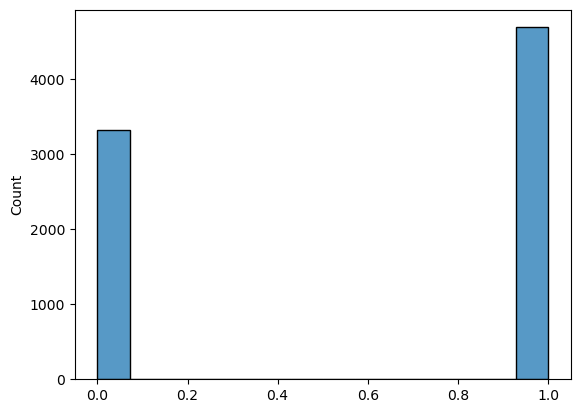

In [42]:
preds_dt=model.predict(train_df[input])
sns.histplot(preds_dt)

c:\Users\Shree\miniconda3\envs\hands_on_ml\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: ylabel='Count'>

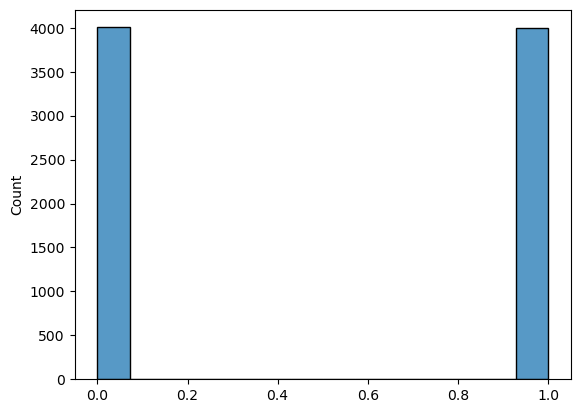

In [43]:
preds_bag=bag_clf.predict(train_df[input])
sns.histplot(preds_bag)

c:\Users\Shree\miniconda3\envs\hands_on_ml\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but BaggingClassifier was fitted with feature names
  warnings.warn(


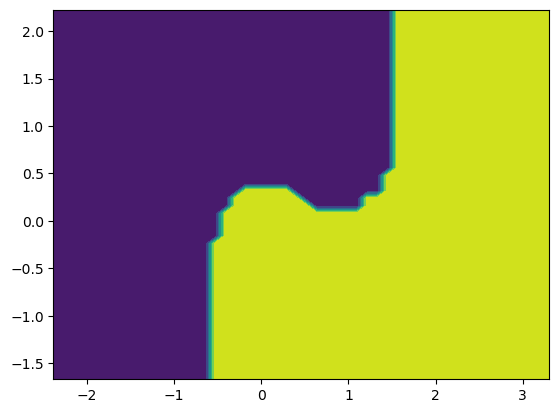

In [44]:
from sklearn.inspection import DecisionBoundaryDisplay
feature_1, feature_2 = np.meshgrid(
    np.linspace(train_df['feature 1'].min(),train_df['feature 1'].max()),
    np.linspace(train_df['feature 2'].min(),train_df['feature 2'].max())
)
grid = np.vstack([feature_1.ravel(), feature_2.ravel()]).T
y_pred = np.reshape(bag_clf.predict(grid),feature_1.shape)
display = DecisionBoundaryDisplay(
    xx0=feature_1, xx1=feature_2, response=y_pred
)
display.plot()

In [45]:
from sklearn.tree import DecisionTreeClassifier
model2 = DecisionTreeClassifier()
model2.fit(train_df[input],train_df[target_col])


DecisionTreeClassifier()

c:\Users\Shree\miniconda3\envs\hands_on_ml\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


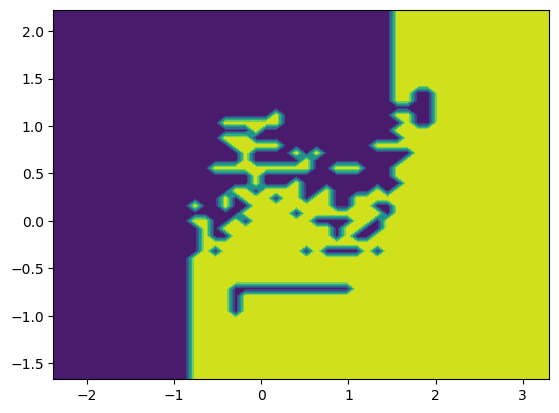

In [46]:
from sklearn.inspection import DecisionBoundaryDisplay
feature_1, feature_2 = np.meshgrid(
    np.linspace(train_df['feature 1'].min(),train_df['feature 1'].max()),
    np.linspace(train_df['feature 2'].min(),train_df['feature 2'].max())
)
grid = np.vstack([feature_1.ravel(), feature_2.ravel()]).T
y_pred = np.reshape(model2.predict(grid),feature_1.shape)
display = DecisionBoundaryDisplay(
    xx0=feature_1, xx1=feature_2, response=y_pred
)
display.plot()

In [47]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
bag_clf_oob= BaggingClassifier(
 DecisionTreeClassifier(), n_estimators=500,
 max_samples=100, bootstrap=True, n_jobs=-1,oob_score=True)
bag_clf_oob.fit(train_df[input],train_df[target_col])
y_pred = bag_clf_oob.predict(train_df[input])

In [48]:
bag_clf_oob.score(test_df[input],test_df[target_col])

0.872

In [49]:
from sklearn.ensemble import RandomForestClassifier
rnd_clf = RandomForestClassifier(n_estimators=500, max_leaf_nodes=40, n_jobs=-1)
rnd_clf.fit(train_df[input],train_df[target_col])
y_pred_rf = rnd_clf.predict(train_df[input])
rnd_clf.score(train_df[input],train_df[target_col])

0.872875

In [50]:
rnd_clf.score(test_df[input],test_df[target_col])

0.8725

In [51]:
from sklearn.ensemble import AdaBoostClassifier
model= AdaBoostClassifier(
 DecisionTreeClassifier(max_depth=1), n_estimators=300, learning_rate=0.6)
model.fit(train_df[input],train_df[target_col])


AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=1),
                   learning_rate=0.6, n_estimators=300)

In [52]:
model.score(train_df[input],train_df[target_col])

0.8645

In [53]:
model.score(test_df[input],test_df[target_col])

0.866

In [105]:
from sklearn.ensemble import GradientBoostingClassifier
model = GradientBoostingClassifier()
model.fit(train_df[input],train_df[target_col])

GradientBoostingClassifier()

In [106]:
model.score(train_df[input],train_df[target_col])

0.87

In [107]:
model.score(test_df[input],test_df[target_col])

0.869